In [1]:
import websocket, json
import numpy as np
import pandas as pd
from binance.enums import *
import requests
from datetime import datetime
import config
from binance.client import Client
import time

# DESCARGA DE DATOS
symbol = 'ETHUSDT'
tick_interval = '1m'

def get_candles(start='', symbol=symbol, tick_interval=tick_interval, limit=1000):
    base_url = 'https://api.binance.com/'
    endpoint = 'api/v3/klines?'

    if start:
        query = 'symbol=' + symbol + '&interval=' + tick_interval + '&startTime=' + str(start) + '&limit=' + str(limit)
    else:
        query = 'symbol=' + symbol + '&interval=' + tick_interval + '&limit=' + str(limit)

    candles = requests.get(base_url + endpoint + query).json()

    return candles, candles[-1][6]


def get_all_candles_from_start(symbol, tick_interval):  # devuelve una lista de velas, cada vela es una lista tb
    start = 1502942400000  # 17 de agosto de 2017
    _, last_time = get_candles(start='', symbol=symbol, tick_interval=tick_interval, limit=1)
    candles = []
    while start < last_time:
        i_candles, next_hop = get_candles(start, symbol, tick_interval)
        candles = candles + i_candles
        start = next_hop
    return candles

In [2]:
# DATAFRAME DATOS
candles = get_all_candles_from_start(symbol, tick_interval)
columns = ['open_time', 'open', 'high', 'low', 'close', 'volume', 'close_time', 'quote', 'trades', 'takers_buy_base',
           'takers_buy_quote', 'ignore']
df = pd.DataFrame(candles, columns=columns)
df = df.sort_values('close_time')
df.drop_duplicates(keep='last')
df = df.astype(float)
closes = df['close'].tolist()

From cffi callback <function _verify_callback at 0x000001E179B3F438>:
Traceback (most recent call last):
  File "C:\Users\alane\Anaconda3\envs\wahoo\lib\site-packages\OpenSSL\SSL.py", line 311, in wrapper
    @wraps(callback)
KeyboardInterrupt


SSLError: HTTPSConnectionPool(host='api.binance.com', port=443): Max retries exceeded with url: /api/v3/klines?symbol=ETHUSDT&interval=1m&startTime=1508847599999&limit=1000 (Caused by SSLError(SSLError("bad handshake: Error([('SSL routines', 'tls_process_server_certificate', 'certificate verify failed')])")))

In [ ]:
df = df[['open', 'high', 'low', 'close', 'volume', 'trades']]

In [108]:
eth = df
eth['750'] = eth.close.rolling(window = 750).mean()
eth['7505'] = eth['750'].rolling(window = 5).mean()
eth['50'] = eth.close.rolling(window = 50).mean()
eth['R'] = eth.high - eth.low
eth['50R'] = eth.R.rolling(window = 50).mean()
eth['18R'] = eth.R.rolling(window = 18).mean()
eth['9'] = eth.close.rolling(window = 9).mean()
eth['9_y'] = np.where(eth['9'], eth['9'].shift(1),0)
eth['9_2y'] = np.where(eth['9'], eth['9'].shift(2),0)
eth['7505_y'] = np.where(eth['7505'], eth['7505'].shift(1), 0)
eth['next_open'] = np.where(eth['open'], eth['open'].shift(-1), 0)
eth =  eth[150000:]

In [109]:
eth

,open,high,low,close,volume,trades,750,7505,50,R,50R,18R,9,9_y,9_2y,7505_y,next_open
150000,501.99,501.99,501.98,501.98,6.66897,7.0,476.552933,476.475957,500.5778,0.01,2.0452,1.660000,502.512222,502.611111,502.614444,476.436584,501.97
150001,501.97,502.00,501.96,501.96,24.43985,14.0,476.589000,476.514552,500.5324,0.04,2.0210,1.501667,502.453333,502.512222,502.611111,476.475957,501.96
150002,501.96,501.97,500.31,500.38,47.28120,17.0,476.622453,476.551317,500.4598,1.66,2.0158,1.483333,502.374444,502.453333,502.512222,476.514552,501.92
150003,501.92,501.92,500.31,500.45,53.78703,14.0,476.656760,476.587352,500.3672,1.61,1.9946,1.571667,502.122222,502.374444,502.453333,476.551317,501.13
150004,501.13,501.83,499.25,499.40,44.18420,17.0,476.689640,476.622157,500.3028,2.58,1.9794,1.538333,501.621111,502.122222,502.374444,476.587352,499.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1943523,3144.09,3149.47,3143.84,3148.70,468.36406,934.0,3063.778987,3063.279096,3148.0328,5.63,5.2528,4.965000,3144.096667,3143.130000,3142.267778,3063.027155,3148.56
1943524,3148.56,3150.80,3147.65,3149.99,544.70851,1000.0,3064.035240,3063.530528,3147.9678,3.15,5.1230,5.041111,3145.131111,3144.096667,3143.130000,3063.279096,3149.99
1943525,3149.99,3150.82,3149.23,3150.72,581.26374,856.0,3064.291720,3063.783312,3147.9938,1.59,5.0318,4.785556,3146.322222,3145.131111,3144.096667,3063.530528,3150.73
1943526,3150.73,3150.82,3147.96,3148.79,304.45000,696.0,3064.548093,3064.036419,3147.9168,2.86,4.9728,4.694444,3147.646667,3146.322222,3145.131111,3063.783312,3148.79


In [129]:
ON_HOLD = False
bought = False
bars = 0
bought_at = 0
sold_at = 0
top = 0
bought_when = []
sold_when = []
duration_pos = []
duration_neg = []
y_curve = []
max_profit_pos = []
max_profit_neg = []
obj_count = 0
thresh_pos = []
thresh_neg = []

for row in eth.iterrows():
    close = row[1]['close']
    nine = row[1]['9']
    nine_y = row[1]['9_y']
    nine_2y = row[1]['9_2y']
    next_open = row[1]['next_open']
    fifty_range = row[1]['50R']
    
    if (ON_HOLD == True) & (bought == False) & (nine < nine_y):
        ON_HOLD = False
        
    if (ON_HOLD == False) & (bought == False):
        svn_5 = row[1]['7505']
        svn_5y = row[1]['7505_y']
        fifty = row[1]['50']
        
        #& (((nine - fifty)/fifty) < 0.004)
        if (svn_5 > svn_5y) & (nine_2y > nine_y) & (nine > nine_y):
            ON_HOLD = True
            if close > nine:
                bought = True
                bars = 1
                
                bought_at = next_open
                bought_when.append(row[0])
                obj = bought_at + (1.5 * fifty_range)
                stop = bought_at - (1.5 * fifty_range)
                ON_HOLD = False
        
    elif (ON_HOLD == True) & (close > nine) & (bought == False):
        bought = True
        bars = 1
        
        bought_at = next_open
        bought_when.append(row[0])
        obj = bought_at + (1.5 * fifty_range)
        stop = bought_at - (1.5 * fifty_range)
        ON_HOLD = False
        
    elif (ON_HOLD == False) & (bought == True):
        bars += 1
        high = row[1]['high']
        low = row[1]['low']
        
        if (bars == 4):
            new_stop = bought_at - ((bought_at - stop)/2)
            if close > new_stop:
                if new_stop < stop:
                    stop = stop
                else:
                    stop = new_stop               
            elif close < new_stop:
                sold_at = next_open
                sold_when.append(row[0])
                bought = False
                bars = 0
                if high > obj:
                    obj_count += 1
                x = sold_at/bought_at
                y = top/bought_at
                z = sold_when[-1] - bought_when[-1]
                y_curve.append(x)
                if x >= 1.0:
                    max_profit_pos.append(y)
                    duration_pos.append(z)
                    thresh_pos.append(obj_count)
                elif x < 1.0:
                    max_profit_neg.append(y)
                    duration_neg.append(z)
                    thresh_neg.append(obj_count)
                top = 0
                obj_count = 0
            
        if (bars == 8):
            if (close > bought_at):
                stop = bought_at
            elif (close < bought_at):
                sold_at = next_open
                sold_when.append(row[0])
                bought = False
                bars = 0
                if high > obj:
                    obj_count += 1
                x = sold_at/bought_at
                y = top/bought_at
                z = sold_when[-1] - bought_when[-1]
                y_curve.append(x)
                if x >= 1.0:
                    max_profit_pos.append(y)
                    duration_pos.append(z)
                    thresh_pos.append(obj_count)
                elif x < 1.0:
                    max_profit_neg.append(y)
                    duration_neg.append(z)
                    thresh_neg.append(obj_count)
                top = 0
                obj_count = 0
                
        if bought == True:
            if high > top:
                top = high
                
            if (low < stop):
                sold_at = stop
                sold_when.append(row[0])
                bought = False
                bars = 0
                if high > obj:
                    obj_count += 1
                x = sold_at/bought_at
                y = top/bought_at
                z = sold_when[-1] - bought_when[-1]
                y_curve.append(x)
                if x >= 1.0:
                    max_profit_pos.append(y)
                    duration_pos.append(z)
                    thresh_pos.append(obj_count)
                elif x < 1.0:
                    max_profit_neg.append(y)
                    duration_neg.append(z)
                    thresh_neg.append(obj_count)
                top = 0
                obj_count = 0

            elif high > obj:
                obj = close + (1.5 * fifty_range)
                if (close - (1.5 * fifty_range) < stop):
                    stop = stop
                else:
                    stop = close - (1.5 * fifty_range)
                obj_count += 1

In [121]:
print(min(y_curve))
print(max(y_curve))

0.9756578125
1.0685722967400269


In [122]:
mec = []
for i, v in enumerate(thresh_neg):
    if v == 1:
        if duration_neg[i] >= 8:
            mec.append(duration_neg[i])
print(len(mec))

27


In [130]:
pos = 0
neg = 0
for y in y_curve:
    if y > 1.0:
        pos += 1
    elif y < 1.0:
        neg += 1
print(f'Positive Trades: {pos}')
print(f'Negative Trades: {neg}')

pos_ = []
neg_ =  []
neut = 0
for y in y_curve:
    if y > 1.0:
        pos_.append(y)
    elif y < 1.0:
        neg_.append(y)

distribution_t_neg = {}
count = 0
x = range(min(thresh_neg), max(thresh_neg) + 1)
for j in x:
    for i in thresh_neg:
        if i == j:
            count += 1
    distribution_t_neg[str(j)] = count
    count = 0

distribution_t_pos = {}
count = 0
x = range(min(thresh_pos), max(thresh_pos) + 1)
for j in x:
    for i in thresh_pos:
        if i == j:
            count += 1
    distribution_t_pos[str(j)] = count
    count = 0

steps = np.arange(0.96, 1.1, 0.0005)
count = 0
distribution = {}
for i, v in enumerate(steps):
    for y in y_curve:
        if i == 0:
            if y < v:
                count += 1
        else:
            if (y > steps[i - 1]) & (y < steps[i]):
                count += 1
    distribution[f'{round(steps[i - 1],4)}-{round(steps[i], 4)}'] = count
    count = 0 
    
print(f'Mean Return Positive Trades: {round((np.mean(pos_) - 1)*100, 5)}%')
print(f'Mean Return Negative Trades: {round((np.mean(neg_) - 1)*100, 5)} %')
print(f'Mean Return from Buy Price to Highest Point in All POSITIVE Movements: {round((np.mean(max_profit_pos) - 1)*100, 5)} %')
print(f'Same with All NEGATIVES: {round((np.mean(max_profit_neg) - 1)*100, 5)} %')
print(f'Mean Duration of Positive Trades: {round(np.mean(duration_pos), 2)}')
print(f'Mean Duration of Negative Trades: {round(np.mean(duration_neg), 2)}')

Positive Trades: 9062
Negative Trades: 26547
Mean Return Positive Trades: 0.44511%
Mean Return Negative Trades: -0.14517 %
Mean Return from Buy Price to Highest Point in All POSITIVE Movements: 0.55867 %
Same with All NEGATIVES: 0.08633 %
Mean Duration of Positive Trades: 15.31
Mean Duration of Negative Trades: 3.82


In [131]:
print('Negative Trades Threshold Crosses Distribution:')
distribution_t_neg

Negative Trades Threshold Crosses Distribution:


{'0': 24788, '1': 1669, '2': 82, '3': 8}

In [132]:
print('Positive Trades Threshold Crosses Distribution:')
distribution_t_pos

Positive Trades Threshold Crosses Distribution:


{'0': 4032,
 '1': 6056,
 '2': 3485,
 '3': 1905,
 '4': 1062,
 '5': 553,
 '6': 258,
 '7': 141,
 '8': 69,
 '9': 47,
 '10': 17,
 '11': 7,
 '12': 4,
 '13': 2,
 '14': 1,
 '15': 0,
 '16': 1,
 '17': 0,
 '18': 0,
 '19': 1,
 '20': 1}

In [19]:
distribution

{'1.1-0.96': 38,
 '0.96-0.9605': 0,
 '0.9605-0.961': 0,
 '0.961-0.9615': 0,
 '0.9615-0.962': 0,
 '0.962-0.9625': 0,
 '0.9625-0.963': 0,
 '0.963-0.9635': 1,
 '0.9635-0.964': 2,
 '0.964-0.9645': 1,
 '0.9645-0.965': 1,
 '0.965-0.9655': 2,
 '0.9655-0.966': 0,
 '0.966-0.9665': 0,
 '0.9665-0.967': 1,
 '0.967-0.9675': 1,
 '0.9675-0.968': 2,
 '0.968-0.9685': 0,
 '0.9685-0.969': 1,
 '0.969-0.9695': 2,
 '0.9695-0.97': 1,
 '0.97-0.9705': 1,
 '0.9705-0.971': 0,
 '0.971-0.9715': 2,
 '0.9715-0.972': 3,
 '0.972-0.9725': 3,
 '0.9725-0.973': 1,
 '0.973-0.9735': 3,
 '0.9735-0.974': 3,
 '0.974-0.9745': 2,
 '0.9745-0.975': 4,
 '0.975-0.9755': 5,
 '0.9755-0.976': 3,
 '0.976-0.9765': 9,
 '0.9765-0.977': 6,
 '0.977-0.9775': 6,
 '0.9775-0.978': 6,
 '0.978-0.9785': 3,
 '0.9785-0.979': 2,
 '0.979-0.9795': 8,
 '0.9795-0.98': 10,
 '0.98-0.9805': 10,
 '0.9805-0.981': 15,
 '0.981-0.9815': 8,
 '0.9815-0.982': 6,
 '0.982-0.9825': 8,
 '0.9825-0.983': 7,
 '0.983-0.9835': 8,
 '0.9835-0.984': 9,
 '0.984-0.9845': 8,
 '0.9

In [20]:
capital = 10000
for x in y_curve:
    capital *= x
print(capital)

3896436030470.965


In [133]:
curve = []
count = 0
capital = 10000
for i in range(0, len(eth)):
    if (sold_when[count] == eth.index[i]) & (count < len(y_curve) - 1):
        curve.append(y_curve[count])
        count += 1
    else:
        curve.append(1)
        
EC = []
z = 10000
for x in curve:
    z += (capital * x) - capital
    EC.append(z)

In [134]:
BH = []
capital = 10000
for row in eth.iterrows():
    close = row[1]['close']
    x = close/eth['close'][150000]
    y = capital * x
    BH.append(y)

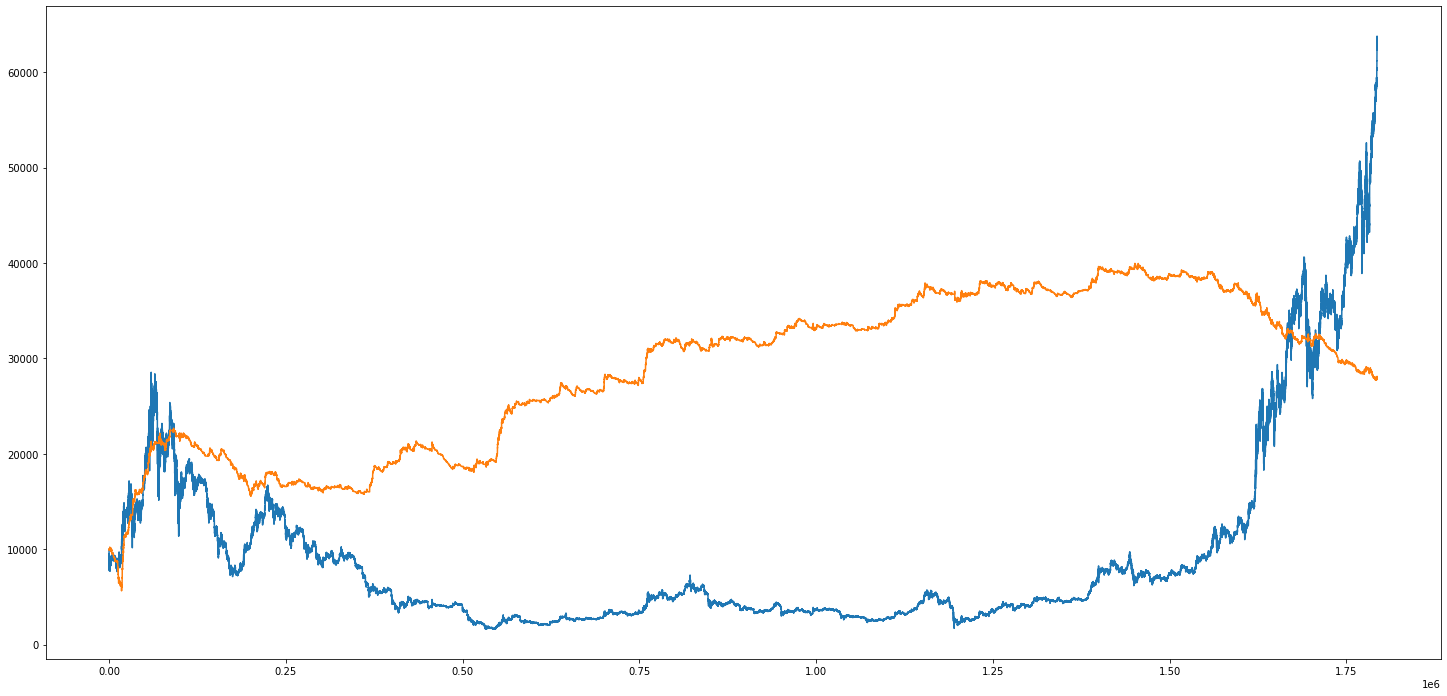

In [135]:
import matplotlib.pyplot as plt
plt.figure(figsize = (25,12))
plt.plot(BH)
plt.plot(EC)